## Análise de dados da rede Telenétrica da ANA
...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [2]:
### importa os dados das estacoes - arquivo csv
dfTelemetrica = pd.read_csv('dfTelemetrica.csv', sep=',', encoding='UTF-8', index_col=0)
dfTelemetrica.head()

,NomeEstacao,Operadora,Responsavel,Municipio-UF,NomeRio,Origem,StatusEstacao,CodEstacao,Bacia,SubBacia,CodRio,Latitude,Longitude,Altitude
1,UHE BELO MONTE BR230,00594 - NORTE ENERGIA - NORTE ENERGIA,00594 - NORTE ENERGIA - NORTE ENERGIA,VITÓRIA DO XINGU-PA,None,Setor Elétrico,Ativo,351004,1,18,0,-3.1267,-51.7906,33.0
2,UHE BELO MONTE SÍTIO PIMENTAL,00594 - NORTE ENERGIA - NORTE ENERGIA,00594 - NORTE ENERGIA - NORTE ENERGIA,VITÓRIA DO XINGU-PA,None,Setor Elétrico,Ativo,351005,1,18,0,-3.3758,-51.9403,110.0
3,UHE BELO MONTE VISTA ALEGRE,00594 - NORTE ENERGIA - NORTE ENERGIA,00594 - NORTE ENERGIA - NORTE ENERGIA,ALTAMIRA-PA,None,Setor Elétrico,Ativo,352009,1,18,0,-3.1186,-52.2525,125.0
4,UHE BELO MONTE SÃO FRANCISCO,00594 - NORTE ENERGIA - NORTE ENERGIA,00594 - NORTE ENERGIA - NORTE ENERGIA,ALTAMIRA-PA,None,Setor Elétrico,Ativo,352010,1,18,0,-3.2533,-52.3489,124.0
5,UHE BELO MONTE JOARI,00594 - NORTE ENERGIA - NORTE ENERGIA,00594 - NORTE ENERGIA - NORTE ENERGIA,SÃO FÉLIX DO XINGÚ-PA,None,Setor Elétrico,Ativo,652002,1,18,0,-6.5603,-52.0764,0.0


In [3]:
dfTelemetrica.columns.values

array(['NomeEstacao', 'Operadora', 'Responsavel', 'Municipio-UF',
       'NomeRio', 'Origem', 'StatusEstacao', 'CodEstacao', 'Bacia',
       'SubBacia', 'CodRio', 'Latitude', 'Longitude', 'Altitude'],
      dtype=object)

In [ ]:
dfTelemetrica['']

In [4]:
dfTelemetrica['Operadora'].value_counts().head(20)

00082 - CPRM - Cia de Pesquisa de Recursos Minerais                      613
00266 - SEMA-RS - SEMA-RS                                                166
00114 - INEMA-BA - Instituto do Meio Ambiente e Recursos Hídrico...      161
00284 - AESA-PB - Agência Executiva de Gestão das Águas do Esta...       127
00080 - CHESF - CHESF                                                     89
00230 - APAC-PE - APAC-PE                                                 89
00069 - FURNAS - Furnas Centrais Elétricas S.A.                           84
00291 - IGARN-RN - IGARN-RN                                               69
00023 - CEMIG - CEMIG                                                     62
00052 - AGUASPARANÁ - Instituto das Águas do Paraná (antiga SUDERHSA)     56
00143 - AES TIETÊ - AES Tietê Energia S.A.                                54
00007 - CEEE - CEEE                                                       48
00028 - COPEL - COPEL                                                     47

In [5]:
dfTelemetrica['Responsavel'].value_counts().head(20)

00001 - ANA - Agência Nacional de Águas                                1065
00266 - SEMA-RS - SEMA-RS                                               166
00080 - CHESF - CHESF                                                    89
00069 - FURNAS - Furnas Centrais Elétricas S.A.                          84
00023 - CEMIG - CEMIG                                                    62
00143 - AES TIETÊ - AES Tietê Energia S.A.                               54
00007 - CEEE - CEEE                                                      48
00028 - COPEL - COPEL                                                    47
00114 - INEMA-BA - Instituto do Meio Ambiente e Recursos Hídrico...      44
00137 - CBA - CBA                                                        41
00284 - AESA-PB - Agência Executiva de Gestão das Águas do Esta...       38
00131 - PARANAPANEMA - Rio Paranapanema Energia S.A                      37
00112 - ENGIE - Engie Brasil Energia S.A.                                35
00008 - LIGH

In [4]:
dfTelemetrica[(dfTelemetrica['Origem'] == 'RHN') & (dfTelemetrica['StatusEstacao'] == 'Ativo')]

,NomeEstacao,Operadora,Responsavel,Municipio-UF,NomeRio,Origem,StatusEstacao,CodEstacao,Bacia,SubBacia,CodRio,Latitude,Longitude,Altitude
7,SÃO LOURENÇO DA MATA II,00082 - CPRM - Cia de Pesquisa de Recursos Min...,00001 - ANA - Agência Nacional de Águas,SÃO LOURENÇO DA MATA-PE,None,RHN,Ativo,835048,3,39,0,-7.9986,-35.0319,70.00
8,CARUARU,00082 - CPRM - Cia de Pesquisa de Recursos Min...,00001 - ANA - Agência Nacional de Águas,CARUARU-PE,None,RHN,Ativo,835106,3,39,0,-8.3028,-36.0108,545.00
9,MORRINHOS,00082 - CPRM - Cia de Pesquisa de Recursos Min...,00001 - ANA - Agência Nacional de Águas,ALTO PARNAÍBA-MA,None,RHN,Ativo,946005,3,34,0,-9.6247,-46.2903,356.00
10,SENA MADUREIRA,00380 - SEMA-AC - Secretaria de Meio Ambiente ...,00380 - SEMA-AC - Secretaria de Meio Ambiente ...,SENA MADUREIRA-AC,None,RHN,Ativo,968006,1,13,0,-9.0586,-68.6592,190.00
11,SANTA ROSA,00380 - SEMA-AC - Secretaria de Meio Ambiente ...,00380 - SEMA-AC - Secretaria de Meio Ambiente ...,SANTA ROSA DO PURUS-AC,None,RHN,Ativo,970003,1,13,0,-9.4386,-70.4922,219.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,PASSO DAS PEDRAS,00082 - CPRM - Cia de Pesquisa de Recursos Min...,00001 - ANA - Agência Nacional de Águas,JAGUARÃO-RS,RIO JAGUARÃO,RHN,Ativo,88260000,8,88,88402000,-32.5194,-53.4558,2.02
4157,CORSAN ARROIO GRANDE,00266 - SEMA-RS - SEMA-RS,00266 - SEMA-RS - SEMA-RS,ARROIO GRANDE-RS,ARROIO GRANDE,RHN,Ativo,88370150,8,88,88303000,-32.2394,-53.0897,0.00
4158,PONTE DO IMPÉRIO PIRATINI,00266 - SEMA-RS - SEMA-RS,00266 - SEMA-RS - SEMA-RS,CERRITO-RS,RIO PIRATINI,RHN,Ativo,88550010,8,88,88200000,-31.7192,-52.9008,0.00
4159,CERRO CHATO HERVAL (CPRM),00266 - SEMA-RS - SEMA-RS,00266 - SEMA-RS - SEMA-RS,HERVAL-RS,ARROIO BASÍLIO,RHN,Ativo,88575050,8,88,88205000,-31.8650,-53.2689,0.00


In [5]:
dfTelemetrica['Origem'].value_counts()

Setor Elétrico         2463
RHN                    1120
GDH                     443
CotaOnline               93
Setor de Saneamento      39
ANA/INPE-SIVAM            4
Name: Origem, dtype: int64

In [7]:
### função para plotar o mapa de distribuição - scatter
#       Data:  'Data frame contendo a base de dados',
#       Type:  'Tipo da rede ou tipo da estação (ver as colunas do data frame)',
#       Title: 'Título do Mapa',
#       Color: 'Cor')
### -----
def ScatterMap(Data, Type, Title, Color):
    ### formato do mapa
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
    ax.set_extent([-100,-20,-60,15], crs = ccrs.PlateCarree())
    ax.set_title(Title)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle = ':')
    gl = ax.gridlines(draw_labels = True, linewidth = 0)
    gl.right_labels = False
    gl.top_labels = False
    ### plot scatter
    if Type == '':
        Data.plot.scatter(ax = ax, x = 'Longitude', y = 'Latitude', s = 0.5, c = Color)
    else:
        Data[Data[Type] == 1].plot.scatter(ax = ax, x = 'Longitude', y = 'Latitude', s = 0.5, c = Color)
    plt.show()

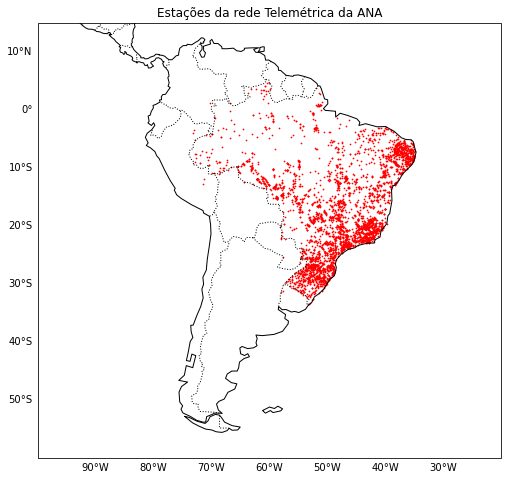

In [7]:
ScatterMap(dfTelemetrica, '', 'Estações da rede Telemétrica da ANA', 'red')